In [202]:
import  matplotlib.pyplot as plt
import torch
import numpy as np
from transformers import BertTokenizer, BertForMaskedLM

In [211]:
tensor = torch.LongTensor([[1, 2], [2,3]])

In [213]:
n = torch.nn.Embedding(2,2)
n.weight

Parameter containing:
tensor([[-2.9919,  0.1865],
        [ 1.7619,  0.1514]], requires_grad=True)

In [214]:
n(tensor)

IndexError: index out of range in self

In [203]:


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased", output_attentions=True, output_hidden_states=True)

# input_ids = tokenizer("The <extra_id_0> walks in <extra_id_1> park", return_tensors="pt").input_ids
# labels = tokenizer("<extra_id_0> cute dog <extra_id_1> the <extra_id_2>", return_tensors="pt").input_ids

input_ids = tokenizer("Who make the neural networks?", return_tensors="pt").input_ids
labels = tokenizer("Answer: It's me.", return_tensors="pt").input_ids

outputs = model(input_ids)
outputs
# # the forward function automatically creates the correct decoder_input_ids
# print(model(input_ids=input_ids, labels=labels)[0])
# print(model(input_ids=input_ids, labels=labels)[1].shape)
# print(len(model(input_ids=input_ids, labels=labels)[2]))
# print(model(input_ids=input_ids, labels=labels)[3][0].shape)

# output = model(input_ids=input_ids, labels=labels)[3]
# outputs = model(input_ids=input_ids, labels=labels)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


MaskedLMOutput(loss=None, logits=tensor([[[ -7.2377,  -7.1716,  -7.1694,  ...,  -6.4026,  -6.3284,  -4.3928],
         [-11.6756, -11.6828, -11.9127,  ..., -10.6978,  -9.7915, -11.8502],
         [-10.9369, -10.4865, -10.6798,  ..., -10.3307,  -8.5971, -13.6046],
         ...,
         [ -5.1920,  -5.5520,  -4.8671,  ...,  -4.0063,  -3.0294,  -7.8224],
         [-12.8636, -12.5627, -12.8225,  ..., -11.8825, -11.9406,  -9.0177],
         [-11.7514, -11.7864, -11.5485,  ...,  -9.6833,  -9.1116, -10.4453]]],
       grad_fn=<ViewBackward0>), hidden_states=(tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
         [-0.1534,  0.3378, -0.1694,  ...,  0.2973,  0.3874, -0.3420],
         [-0.0421, -0.1044, -0.3429,  ...,  0.4913,  0.4466,  0.2010],
         ...,
         [-0.3550, -0.4835, -0.3444,  ..., -0.0858,  0.5635,  0.7728],
         [ 0.6001, -0.4142, -0.5467,  ...,  0.1408,  0.6732,  0.5784],
         [-0.2551, -0.2671,  0.0799,  ..., -0.4287,  0.3415, -0.1055]]],

In [204]:
model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [163]:
tokenizer("Answer: It's me.", return_tensors="pt").input_ids

tensor([[ 101, 3437, 1024, 2009, 1005, 1055, 2033, 1012,  102]])

In [162]:
tokenizer.tokenize("Who make the neural networks?")

['who', 'make', 'the', 'neural', 'networks', '?']

In [140]:
outputs.logits.shape

torch.Size([1, 8, 30522])

In [143]:
outputs.hidden_states[0].shape

torch.Size([1, 8, 768])

In [136]:
outputs.hidden_states[0][0].shape

torch.Size([8, 768])

In [145]:
torch.argmax(outputs.logits, dim=1)

tensor([[5, 5, 5,  ..., 5, 5, 0]])

In [146]:
torch.argmax(outputs.hidden_states[0][0], dim=1)

tensor([139, 387, 600, 304, 470,  71,  47, 461])

In [155]:
outputs.hidden_states[1][0].shape

torch.Size([8, 768])

In [156]:
torch.argmax(outputs.hidden_states[1][0], dim=1)

tensor([139, 724, 157, 604, 470, 311, 598, 545])

In [159]:
torch.argmax(outputs.hidden_states[12][0], dim=1)

tensor([205, 205, 505, 429, 123, 281, 657, 123])

In [160]:
tokenizer.decode(torch.argmax(outputs.hidden_states[0][0], dim=1))

'[unused200] [unused200] [unused500] [unused424] [unused118] [unused276] [unused652] [unused118]'

In [125]:
vis = outputs.hidden_states[0][0].detach().numpy()
vis.shape

(8, 768)

In [190]:
tokenizer.decode(torch.argmax(outputs.logits[0], dim=1)[1])

'w h o'

In [174]:
tokenizer.tokenize("Who make the neural networks?")

['who', 'make', 'the', 'neural', 'networks', '?']

In [164]:
len(vis)

8

In [199]:
vis = outputs.hidden_states[12][0].detach().numpy()
vis.shape

(8, 768)

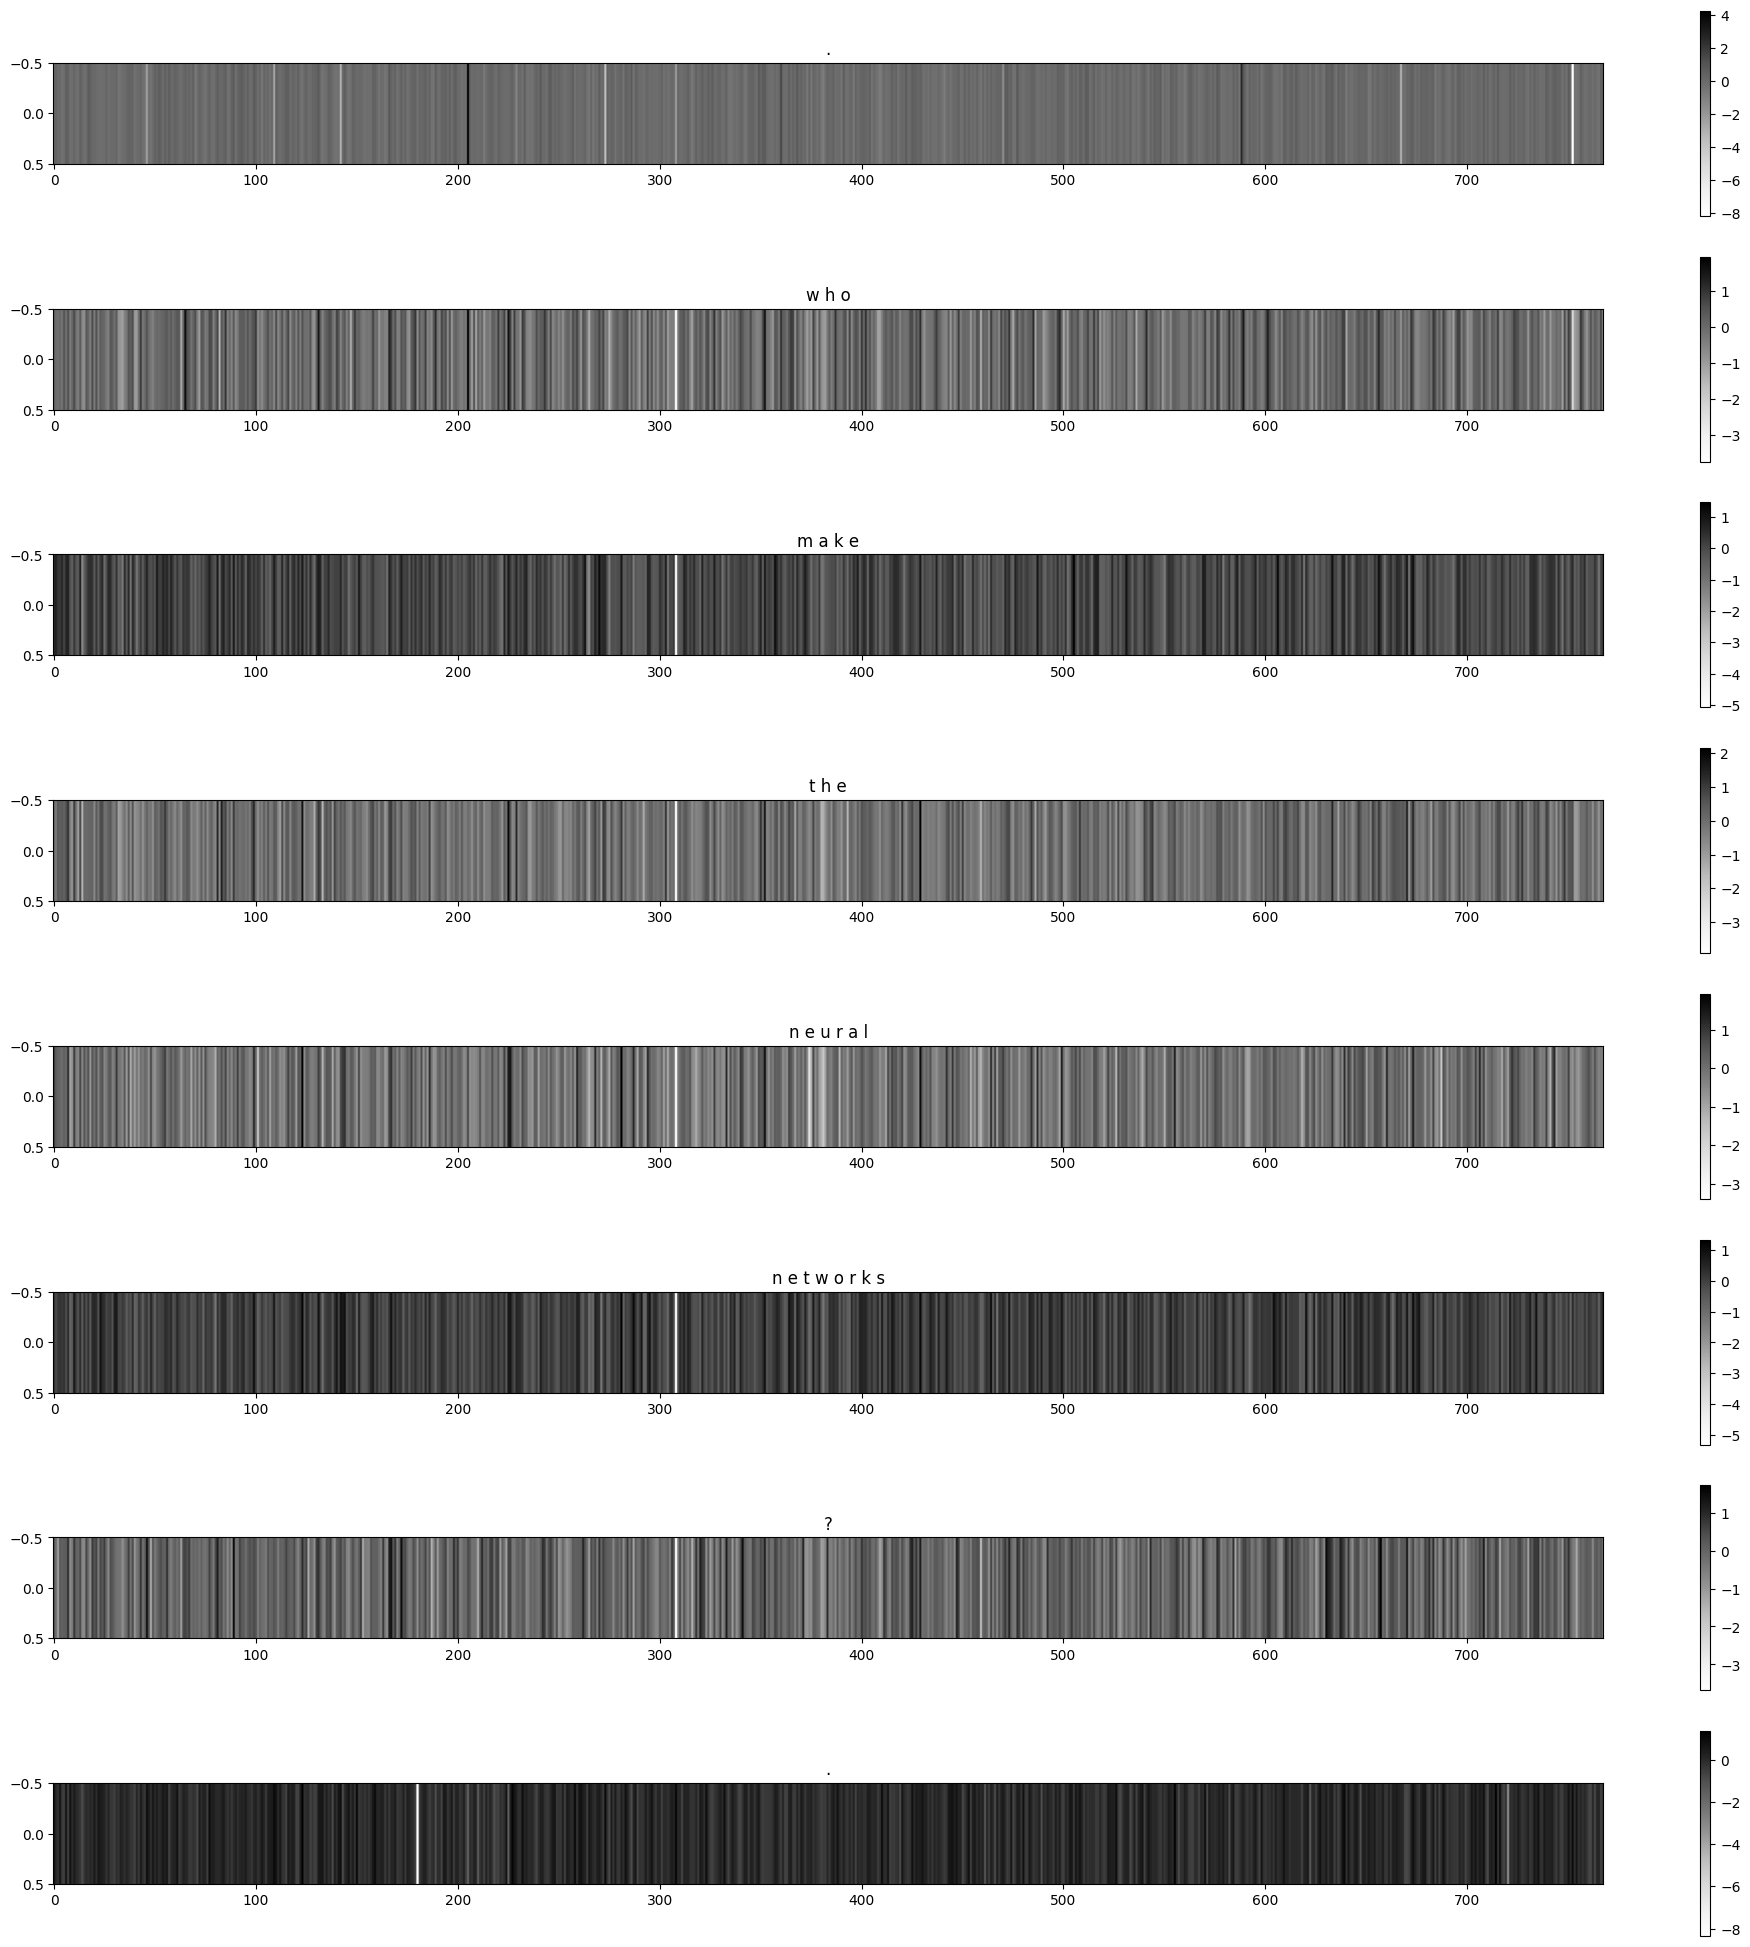

In [200]:
fig, axs = plt.subplots(len(vis), figsize=(25,25))

for i in range(len(vis)):
    img = axs[i].imshow(np.expand_dims(vis[i], axis=0),  aspect='50', cmap='Greys')
    axs[i].set_title(tokenizer.decode(torch.argmax(outputs.logits[0], dim=1)[i]))
    plt.colorbar(img) 


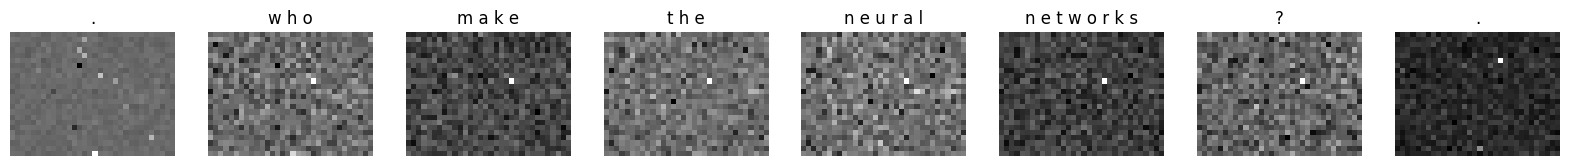

In [201]:
fig, axs = plt.subplots(1, len(vis), figsize=(20,5))
axs = axs.ravel()

for i in range(len(vis)):
    axs[i].imshow(vis[i].reshape(24,32), cmap='Greys')
    axs[i].axis('off')
    axs[i].set_title(tokenizer.decode(torch.argmax(outputs.logits[0], dim=1)[i]))

In [84]:
model(input_ids)

MaskedLMOutput(loss=None, logits=tensor([[[ -7.7025,  -7.5999,  -7.5597,  ...,  -6.6125,  -6.7359,  -4.4971],
         [ -9.5950,  -9.3400,  -9.5385,  ...,  -8.7478,  -7.9935,  -7.3765],
         [-13.2476, -13.2456, -13.4287,  ..., -12.3776,  -9.7438,  -7.1162],
         ...,
         [ -4.6788,  -5.0141,  -4.3476,  ...,  -4.0624,  -2.7592,  -6.8950],
         [-11.2987, -10.6992, -11.0321,  ..., -10.9154, -10.2543,  -4.8030],
         [-12.3049, -12.2362, -11.9623,  ..., -10.4441, -10.0084,  -9.8981]]],
       grad_fn=<ViewBackward0>), hidden_states=None, attentions=(tensor([[[[6.2539e-02, 9.5509e-02, 6.0711e-02,  ..., 7.2053e-02,
           8.7240e-02, 3.1810e-01],
          [9.3663e-02, 5.0733e-02, 2.4465e-01,  ..., 8.9263e-02,
           1.2065e-01, 1.2770e-01],
          [7.8233e-02, 9.2531e-02, 7.0577e-02,  ..., 8.0950e-02,
           1.2178e-01, 7.1035e-02],
          ...,
          [8.3326e-02, 1.3781e-01, 1.3008e-01,  ..., 7.7852e-02,
           1.8830e-01, 4.9317e-02],
     

In [58]:
outputs.attentions

tensor([[[[4.8692e-01, 3.2592e-02, 3.4962e-02,  ..., 7.4183e-02,
           7.2860e-02, 9.4663e-02],
          [1.5668e-01, 1.4070e-01, 2.2068e-01,  ..., 1.0919e-02,
           1.2366e-01, 2.4487e-01],
          [6.6732e-02, 9.7519e-02, 5.6176e-01,  ..., 1.4351e-02,
           3.7126e-02, 9.9135e-02],
          ...,
          [7.1834e-02, 6.3444e-02, 2.8932e-01,  ..., 3.1673e-02,
           1.0775e-01, 2.3362e-01],
          [4.6106e-01, 3.8616e-02, 9.4035e-02,  ..., 1.9856e-02,
           6.4403e-02, 1.9881e-01],
          [6.3283e-01, 3.8740e-02, 3.8175e-02,  ..., 5.4227e-02,
           5.6910e-02, 5.8808e-02]],

         [[6.1379e-01, 3.0476e-02, 7.8552e-02,  ..., 5.5893e-02,
           3.4870e-02, 9.4676e-02],
          [2.0442e-01, 9.6377e-03, 7.6889e-01,  ..., 1.1042e-03,
           8.6107e-04, 4.1615e-04],
          [5.5014e-01, 1.3669e-03, 7.3352e-02,  ..., 8.4512e-04,
           1.1482e-02, 5.3986e-03],
          ...,
          [8.5722e-01, 3.5805e-05, 6.9598e-04,  ..., 9.1152

In [59]:
vis = outputs.attentions[0][0].detach().cpu().numpy()

In [61]:
vis.shape

(12, 10, 10)

In [62]:
print(vis.sum())
print(vis.mean())
print(vis.min())
print(vis.max())
print(vis.sum())

120.0
0.1
2.3723884e-05
0.9666823
120.0


In [63]:
torch.argmax(outputs[0][0], dim=1)#.shape

tensor([ 1012,  1012,  1024,  2040,  2191,  1996, 15756,  6125,  1029,  1012])

In [79]:
tokenizer.decode(torch.argmax(outputs[0][0], dim=1)[0])

'.'

In [65]:
vis.shape

(12, 10, 10)

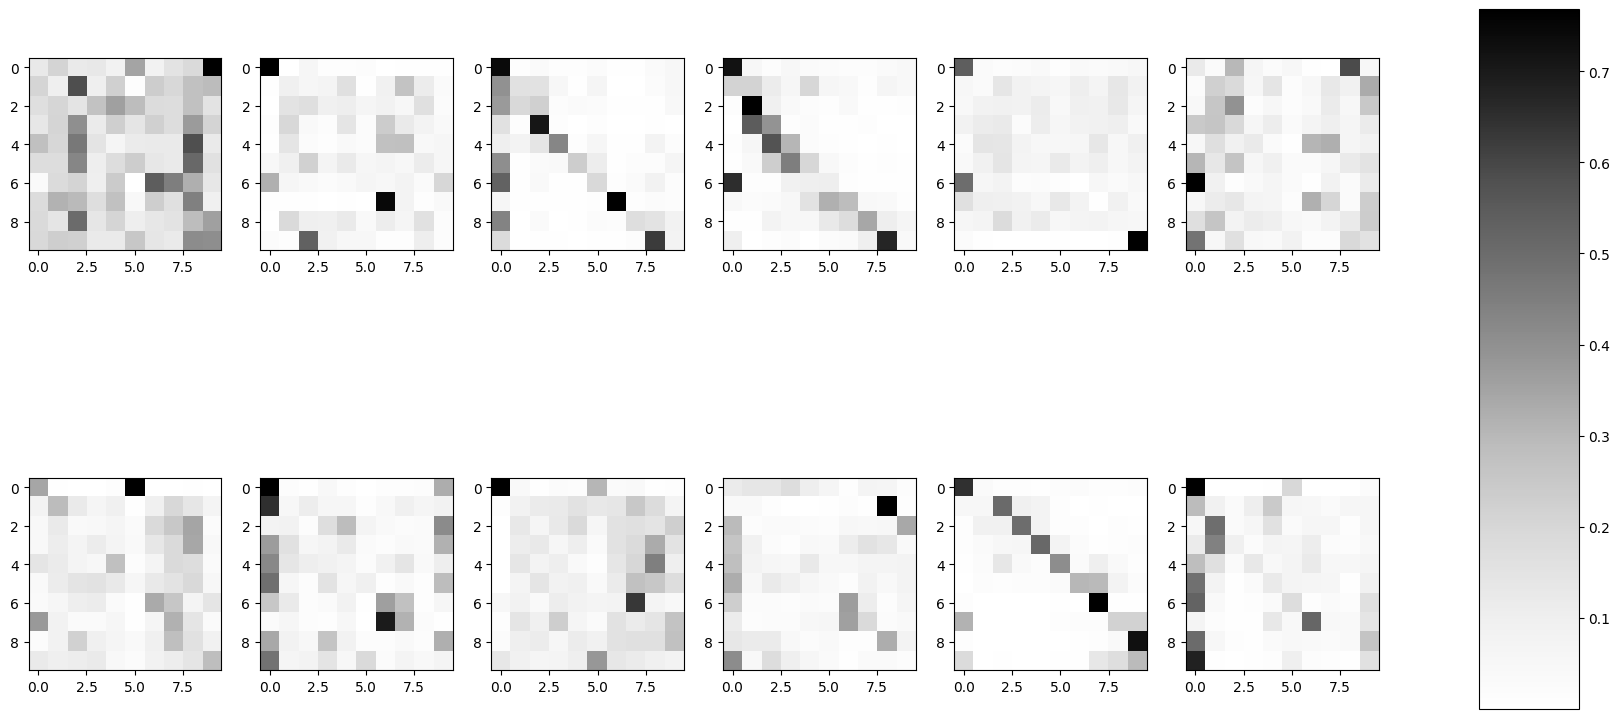

In [81]:
fig, axs = plt.subplots(2, len(vis)//2, figsize=(20,10))
axs = axs.ravel()


for i in range(len(vis)):
    img = axs[i].imshow(vis[i], cmap='Greys')
    #axs[i].title=tokenizer.decode(torch.argmax(outputs[0][0], dim=1)[i])
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(img, cax=cbar_ax)
# plt.colorbar(img)



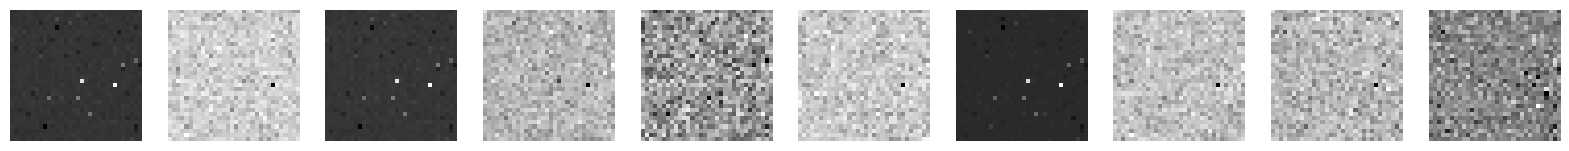

In [199]:
fig, axs = plt.subplots(1, len(show_vis), figsize=(20,5))
axs = axs.ravel()

for i in range(len(show_vis)):
    axs[i].imshow(vis[i].reshape(32,32), cmap='Greys')
    axs[i].axis('off')

In [204]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google/t5-v1_1-large")
model = T5ForConditionalGeneration.from_pretrained("google/t5-v1_1-large")

task_prefix = "translate English to German: "
# use different length sentences to test batching
sentences = ["The house is wonderful.", "I like to work in NYC."]

task_prefix = "Describe the structure of an atom: "
# use different length sentences to test batching
sentences = ["An atom is "]

inputs = tokenizer([task_prefix + sentence for sentence in sentences], return_tensors="pt", padding=True)

output_sequences = model.generate(
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    do_sample=False,  # disable sampling to test if batching affects output
)

print(tokenizer.batch_decode(output_sequences, skip_special_tokens=True))

['composed of one element.: a part of an element. An atom']


In [205]:
output_sequences.shape

torch.Size([1, 20])

In [211]:
outputs[1].shape

torch.Size([1, 89, 32128])

In [212]:
decoder_token = torch.argmax(outputs[1][0], dim=1)
decoder_token

tensor([32099,    37,    19, 32074, 32072, 32074, 32072, 32074,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1, 32073,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1])

In [213]:
tokenizer.decode(torch.argmax(outputs[1][0], dim=1))

'<extra_id_0> The is<extra_id_25><extra_id_27><extra_id_25><extra_id_27><extra_id_25></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s><extra_id_26></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s>'

In [177]:
encoder_input_ids = tokenizer("She sees the small elephant.", return_tensors="pt", add_special_tokens=True).input_ids
with tokenizer.as_target_tokenizer():
    decoder_input_ids = tokenizer("Sie sieht den kleinen Elefanten.", return_tensors="pt", add_special_tokens=True).input_ids

outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

In [178]:
outputs[2][0]

tensor([[ 0.1013, -0.0545,  0.0157,  ..., -0.0537,  0.0248, -0.0388],
        [-0.1161, -0.0119,  0.0138,  ...,  0.0043,  0.0648, -0.1102],
        [-0.0038,  0.0308,  0.0091,  ..., -0.0124,  0.0403, -0.0492],
        ...,
        [-0.1220, -0.1273,  0.0479,  ..., -0.0128, -0.0932, -0.0863],
        [-0.0402,  0.0635,  0.0187,  ..., -0.0760,  0.0126, -0.0226],
        [ 0.1235, -0.0060,  0.0489,  ..., -0.0745,  0.3083,  0.0165]],
       grad_fn=<SelectBackward0>)

In [13]:
from transformers import AutoTokenizer, AutoModel

tokenizer = T5Tokenizer.from_pretrained("google/t5-v1_1-small")
model = T5ForConditionalGeneration.from_pretrained("google/t5-v1_1-small", output_attentions=True)

In [24]:
# encoder_input_ids = tokenizer("She sees the small elephant.", return_tensors="pt", add_special_tokens=True).input_ids
# with tokenizer.as_target_tokenizer():
#     decoder_input_ids = tokenizer("Sie sieht den kleinen Elefanten.", return_tensors="pt", add_special_tokens=True).input_ids

encoder_input_ids = tokenizer("Question: Who make the neural networks?", return_tensors="pt", add_special_tokens=True).input_ids
with tokenizer.as_target_tokenizer():
    decoder_input_ids = tokenizer("Answer: It's me.", return_tensors="pt", add_special_tokens=True).input_ids


outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

In [25]:
from bertviz import model_view
model_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens= encoder_text,
    decoder_tokens = decoder_text
)

<IPython.core.display.Javascript object>